In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix,accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

## Fetching Data

In [158]:
data = pd.read_csv('task_data.csv')
df = data.copy()
df.head(5)

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,sample0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,sample1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,sample2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,sample3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,sample4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


## Checking for null values

In [159]:
print(str("NaN values present : "), df.isnull().values.any())

NaN values present :  False


Since there are no null values we don't need to remove any columns

## Reshuffling the dataset

If you check the dataset you will see that the initial part of the dataset has samples of class_label 1 and the remaining are all -1 so there is a possibility this might cause a bias in the data.

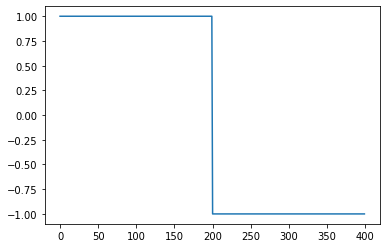

In [160]:
df1 = df[::]
plt.plot(df1.index,df1['class_label'])
plt.show()

So, inorder to tackle this problem we can shuffle the rows.

In [161]:
df2 = df.sample(frac=1).reset_index(drop=True)
df2.head()

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,sample88,1.0,0.752644,0.925478,0.632028,0.799003,0.846945,0.883198,0.006899,0.892787,0.551989,0.063958
1,sample316,-1.0,0.335045,0.448048,0.977328,0.989525,0.088365,0.136016,0.338319,0.430504,0.041268,0.695692
2,sample334,-1.0,0.752760,0.463218,0.194389,0.049601,0.005896,0.211161,0.311582,0.463332,0.436559,0.037082
3,sample247,-1.0,0.268169,0.506627,0.746145,0.665735,0.280789,0.064341,0.697371,0.206435,0.910886,0.028283
4,sample56,1.0,0.990002,0.536729,0.745808,0.674382,0.607990,0.995201,0.207925,0.770241,0.529636,0.008039


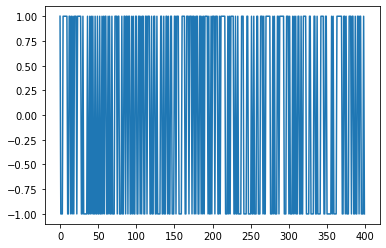

In [162]:
df3 = df2[::]
plt.plot(df3.index,df3['class_label'])
plt.show()

In [163]:
df3.describe()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.000000,0.523661,0.509223,0.481238,0.509752,0.497875,0.501065,0.490480,0.482372,0.482822,0.541933
std,1.001252,0.268194,0.276878,0.287584,0.297712,0.288208,0.287634,0.289954,0.282714,0.296180,0.272490
min,-1.000000,0.007775,0.003865,0.004473,0.001466,0.000250,0.000425,0.000173,0.003322,0.003165,0.000452
25%,-1.000000,0.299792,0.283004,0.235544,0.262697,0.249369,0.269430,0.226687,0.242848,0.213626,0.321264
50%,0.000000,0.534906,0.507583,0.460241,0.510066,0.497842,0.497108,0.477341,0.463438,0.462251,0.578389
75%,1.000000,0.751887,0.727843,0.734937,0.768975,0.743401,0.738854,0.735304,0.732483,0.740542,0.768990
max,1.000000,0.999476,0.998680,0.992963,0.995119,0.999412,0.997367,0.997141,0.998230,0.996098,0.999465


## Checking for correlation

In [164]:
df3.corr()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
class_label,1.000000,0.543295,-0.252007,0.038775,0.433636,0.607623,0.224147,-0.007414,0.175612,0.660618,0.094907
sensor0,0.543295,1.000000,-0.215668,0.019521,0.253244,0.300760,0.164243,-0.007849,0.080306,0.361751,0.001317
sensor1,-0.252007,-0.215668,1.000000,0.056042,-0.111347,-0.130463,0.055401,-0.106082,0.031513,-0.163818,-0.023655
sensor2,0.038775,0.019521,0.056042,1.000000,0.093447,-0.023486,-0.008948,-0.057090,0.006899,-0.008308,-0.058528
sensor3,0.433636,0.253244,-0.111347,0.093447,1.000000,0.295136,0.038152,-0.105005,0.001243,0.287776,0.013732
sensor4,0.607623,0.300760,-0.130463,-0.023486,0.295136,1.000000,0.183916,-0.022690,0.090186,0.378306,0.023776
sensor5,0.224147,0.164243,0.055401,-0.008948,0.038152,0.183916,1.000000,-0.061238,0.020814,0.220014,0.071258
sensor6,-0.007414,-0.007849,-0.106082,-0.057090,-0.105005,-0.022690,-0.061238,1.000000,0.065211,-0.073309,0.040744
sensor7,0.175612,0.080306,0.031513,0.006899,0.001243,0.090186,0.020814,0.065211,1.000000,0.060028,0.059341
sensor8,0.660618,0.361751,-0.163818,-0.008308,0.287776,0.378306,0.220014,-0.073309,0.060028,1.000000,-0.033991


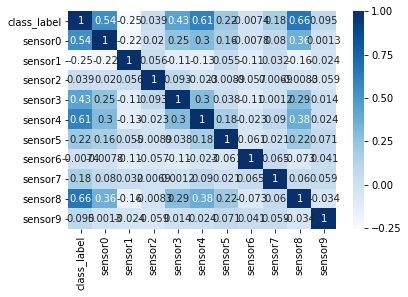

In [165]:
sns.heatmap(df3.corr(), annot=True, cmap='Blues');

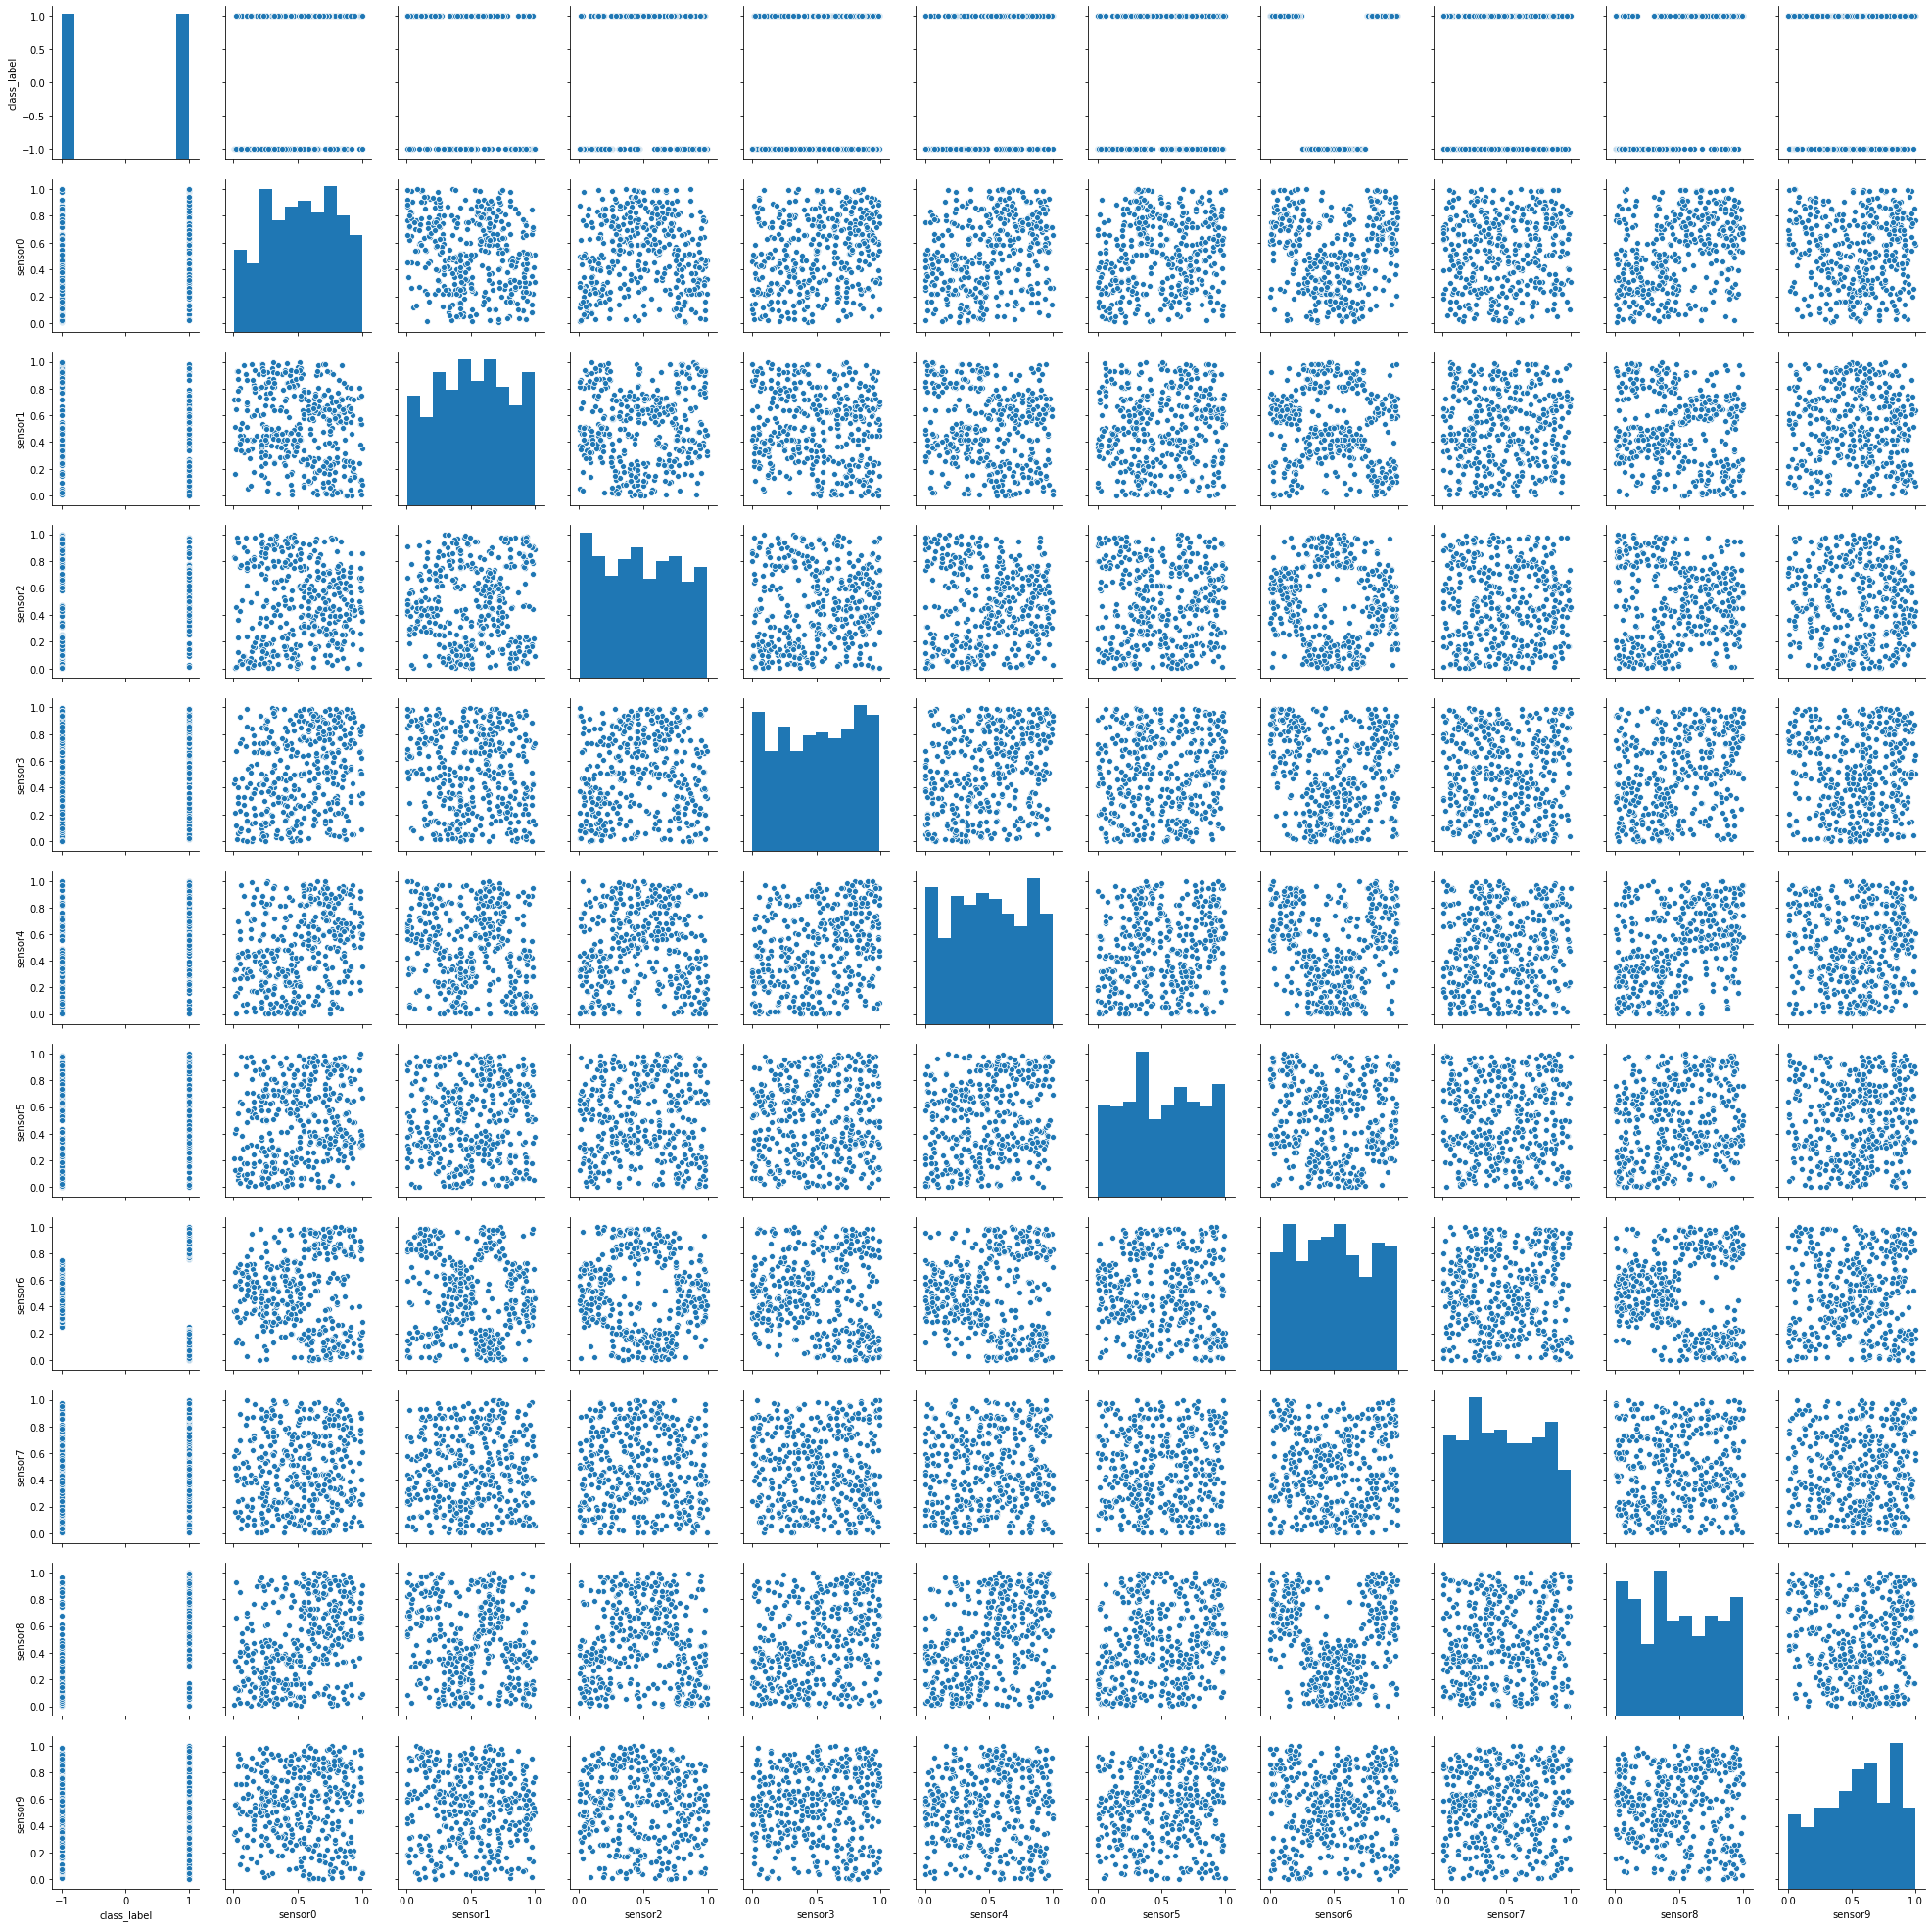

In [166]:
scatter = sns.pairplot(df3, kind='scatter');

From the scatter plots it is visible there is no correlation between the various sensor's data 

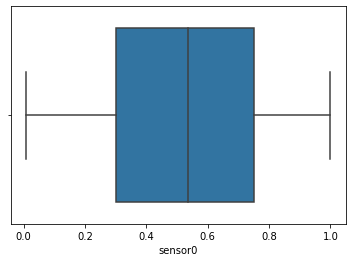

In [167]:
sns.boxplot(x=df3['sensor0'])

## Checking for outliers

We will look at some 

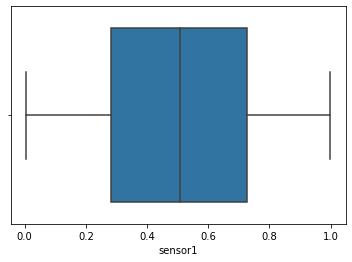

In [168]:
sns.boxplot(x=df3['sensor1'])

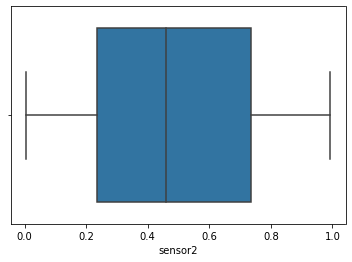

In [169]:
sns.boxplot(x=df3['sensor2'])

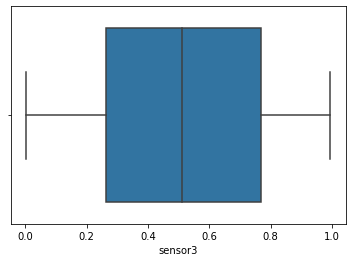

In [170]:
sns.boxplot(x=df3['sensor3'])

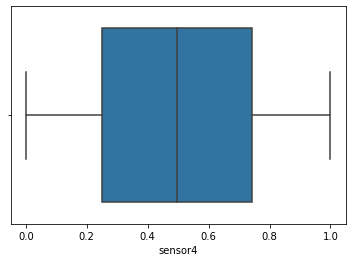

In [171]:
sns.boxplot(x=df3['sensor4'])

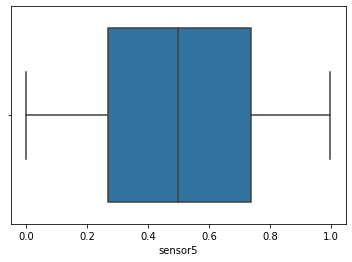

In [172]:
sns.boxplot(x=df3['sensor5'])

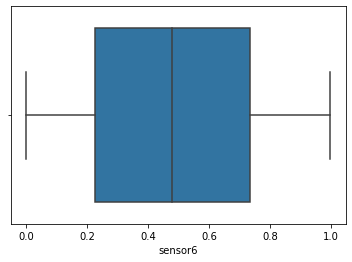

In [173]:
sns.boxplot(x=df3['sensor6'])

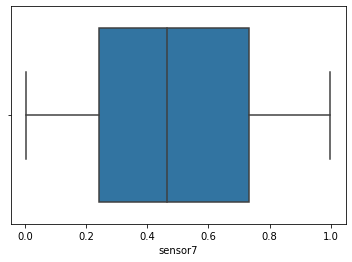

In [174]:
sns.boxplot(x=df3['sensor7'])

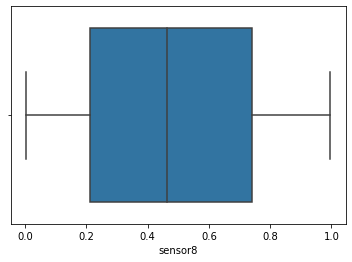

In [175]:
sns.boxplot(x=df3['sensor8'])

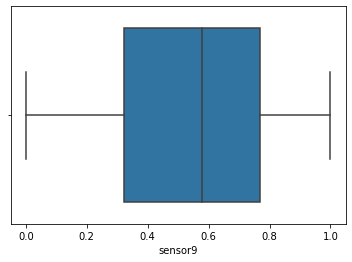

In [176]:
sns.boxplot(x=df3['sensor9'])

In [177]:
X = pd.DataFrame.to_numpy(df3.iloc[:,2:13])
y = pd.DataFrame.to_numpy(df3['class_label'])

In [178]:
print(type(X))
X[:5]

<class 'numpy.ndarray'>


array([[0.7526444 , 0.92547784, 0.63202841, 0.79900341, 0.84694534,
        0.88319775, 0.00689919, 0.89278708, 0.55198873, 0.06395784],
       [0.33504543, 0.44804761, 0.97732753, 0.98952481, 0.08836544,
        0.13601587, 0.33831948, 0.43050407, 0.04126773, 0.69569245],
       [0.75275992, 0.46321783, 0.19438863, 0.04960052, 0.00589568,
        0.21116078, 0.31158153, 0.46333184, 0.43655912, 0.03708198],
       [0.2681691 , 0.50662701, 0.7461448 , 0.66573464, 0.28078857,
        0.06434112, 0.69737115, 0.20643491, 0.9108857 , 0.02828345],
       [0.9900022 , 0.53672932, 0.74580769, 0.67438193, 0.60798965,
        0.99520089, 0.20792546, 0.77024088, 0.52963571, 0.00803856]])

In [179]:
y[:5]

array([ 1., -1., -1., -1.,  1.])

In [180]:
y.shape

(400,)

In [181]:
X_train = X[:int(0.6*len(X))]
X_val = X[int(0.6*len(X)):int(0.8*len(X))]
X_test = X[int(0.8*len(X)):]

y_train = y[:int(0.6*len(y))]
y_val = y[int(0.6*len(y)):int(0.8*len(y))]
y_test = y[int(0.8*len(y)):]

print((X_train).shape,X_val.shape, (X_test).shape)

(240, 10) (80, 10) (80, 10)


In [182]:
y_train.shape

(240,)

## Logistic Regression

In this section we will check the accuracy using <b>cross validation</b>.

In [183]:
clf0 = LogisticRegression(random_state = 0).fit(X,y)
cv_scores = cross_val_score(clf0, X, y, cv=5, scoring='accuracy')
print(f'Accuracy : {cv_scores.mean()*100}%')

Accuracy : 92.5%


In this section we will check using a fixed distribution with <b>train, validation and test sets</b> split differently.

In [184]:
clflg1 = LogisticRegression(random_state = 0).fit(X_train,y_train)
y_val_pred_df = clflg1.predict(X_val)
y_train_pred_df = clflg1.predict(X_train)
y_test_pred_df = clflg1.predict(X_test)
y_train_df_cm = confusion_matrix(y_train,y_train_pred_df)
y_val_df_cm = confusion_matrix(y_val,y_val_pred_df)
y_test_df_cm = confusion_matrix(y_test,y_test_pred_df)

# print(f'Confusion Matrix for Y train:\n{y_train_cm}')
print (f"Train Accuracy : {accuracy_score(y_train,y_train_pred_df)*100}%")      
# print("Report : ", classification_report(y_train,y_train_pred_df))
# print(f'Confusion Matrix for Y val:\n{y_val_cm}')
print (f"Validation Accuracy : {accuracy_score(y_val,y_val_pred_df)*100}%")      
# print("Report : ", classification_report(y_val,y_val_pred_df))
# print(f'Confusion Matrix for Y test:\n{y_test_cm}')
print (f"Accuracy : {accuracy_score(y_test,y_test_pred_df)*100}%")      
# print("Report : ", classification_report(y_test,y_test_pred_df))

Train Accuracy : 92.91666666666667%
Validation Accuracy : 91.25%
Accuracy : 96.25%


## Decision Tree

In this section we will check the accuracy using <b>cross validation</b>.

In [185]:
clfdf = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=4, min_samples_leaf=5).fit(X,y)
cv_scores = cross_val_score(clfdf, X, y, cv=5, scoring='accuracy')
print(f'Accuracy : {cv_scores.mean()*100}%')

Accuracy : 97.00000000000001%


In this section we will check using a fixed distribution with <b>train, validation and test sets</b> split differently.

In [186]:
clfdf_ = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=4, min_samples_leaf=5).fit(X_train,y_train)
y_val_pred_df = clfdf_.predict(X_val)
y_train_pred_df = clfdf_.predict(X_train)
y_test_pred_df = clfdf_.predict(X_test)
y_train_df_cm = confusion_matrix(y_train,y_train_pred_df)
y_val_df_cm = confusion_matrix(y_val,y_val_pred_df)
y_test_df_cm = confusion_matrix(y_test,y_test_pred_df)

# print(f'Confusion Matrix for Y train:\n{y_train_cm}')
print (f"Train Accuracy : {accuracy_score(y_train,y_train_pred_df)*100}%")      
# print("Report : ", classification_report(y_train,y_train_pred_df))
# print(f'Confusion Matrix for Y val:\n{y_val_cm}')
print (f"Validation Accuracy : {accuracy_score(y_val,y_val_pred_df)*100}%")      
# print("Report : ", classification_report(y_val,y_val_pred_df))
# print(f'Confusion Matrix for Y test:\n{y_test_cm}')
print (f"Accuracy : {accuracy_score(y_test,y_test_pred_df)*100}%")      
# print("Report : ", classification_report(y_test,y_test_pred_df))

Train Accuracy : 98.75%
Validation Accuracy : 93.75%
Accuracy : 95.0%


## Ranking Features 

We will try using Decision Trees to find out the ranking of the sensors, since decision trees have the more accuracy. Using cross validation.

We will try by removing one feature at a time and see how much it affects the accuracy.

In [187]:
X0 = pd.DataFrame.to_numpy(df3.iloc[:,3:13])
clfdf = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=4, min_samples_leaf=5).fit(X0,y)
cv_scores = cross_val_score(clfdf, X0, y, cv=5, scoring='accuracy')
print(f'Accuracy : {cv_scores.mean()*100}%')

Accuracy : 96.00000000000001%


We can see here the accuracy decreases from 97% to 96% (i.e.by 1%) by removing sensor 0. Therefore the impact of sensor 0 is <b>+1%</b>

In [188]:
X1 = pd.DataFrame.to_numpy(df3.iloc[:,2:13].drop("sensor1", axis=1))
clfdf = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=4, min_samples_leaf=5).fit(X1,y)
cv_scores = cross_val_score(clfdf, X1, y, cv=5, scoring='accuracy')
print(f'Accuracy : {cv_scores.mean()*100}%')

Accuracy : 97.24999999999999%


We can see here the accuracy increases from 97% to 97.25% (i.e.by 0.25%) by removing sensor 1. Therefore the impact of sensor 1 is <b>-0.25%</b>

In [189]:
X2 = pd.DataFrame.to_numpy(df3.iloc[:,2:13].drop("sensor2", axis=1))
clfdf = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=4, min_samples_leaf=5).fit(X2,y)
cv_scores = cross_val_score(clfdf, X2, y, cv=5, scoring='accuracy')
print(f'Accuracy : {cv_scores.mean()*100}%')

Accuracy : 97.00000000000001%


We can see here the accuracy unchanged (i.e.by 0%) by removing sensor 2. Therefore the impact of sensor 2 is <b>0%</b>

In [190]:
X3 = pd.DataFrame.to_numpy(df3.iloc[:,2:13].drop("sensor3", axis=1))
clfdf = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=4, min_samples_leaf=5).fit(X3,y)
cv_scores = cross_val_score(clfdf, X3, y, cv=5, scoring='accuracy')
print(f'Accuracy : {cv_scores.mean()*100}%')

Accuracy : 97.00000000000001%


We can see here the accuracy unchanged (i.e.by 0%) by removing sensor 3. Therefore the impact of sensor 3 is <b>0%</b>

In [191]:
X4 = pd.DataFrame.to_numpy(df3.iloc[:,2:13].drop("sensor4", axis=1))
clfdf = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=4, min_samples_leaf=5).fit(X4,y)
cv_scores = cross_val_score(clfdf, X4, y, cv=5, scoring='accuracy')
print(f'Accuracy : {cv_scores.mean()*100}%')

Accuracy : 97.00000000000001%


We can see here the accuracy unchanged (i.e.by 0%) by removing sensor 4. Therefore the impact of sensor 4 is <b>0%</b>

In [192]:
X5 = pd.DataFrame.to_numpy(df3.iloc[:,2:13].drop("sensor5", axis=1))
clfdf = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=4, min_samples_leaf=5).fit(X5,y)
cv_scores = cross_val_score(clfdf, X5, y, cv=5, scoring='accuracy')
print(f'Accuracy : {cv_scores.mean()*100}%')

Accuracy : 97.00000000000001%


We can see here the accuracy is unchanged (i.e.by 0%) by removing sensor 5. Therefore the impact of sensor 5 is <b>0%</b>

In [193]:
X6 = pd.DataFrame.to_numpy(df3.iloc[:,2:13].drop("sensor6", axis=1))
clfdf = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=4, min_samples_leaf=5).fit(X6,y)
cv_scores = cross_val_score(clfdf, X6, y, cv=5, scoring='accuracy')
print(f'Accuracy : {cv_scores.mean()*100}%')

Accuracy : 90.25000000000001%


We can see here the accuracy decreases from 97% to 90.25% (i.e.by 6.75%) by removing sensor 6. Therefore the impact of sensor 6 is <b>+6.75%</b>

In [194]:
X7 = pd.DataFrame.to_numpy(df3.iloc[:,2:13].drop("sensor7", axis=1))
clfdf = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=4, min_samples_leaf=5).fit(X7,y)
cv_scores = cross_val_score(clfdf, X5, y, cv=5, scoring='accuracy')
print(f'Accuracy : {cv_scores.mean()*100}%')

Accuracy : 97.00000000000001%


We can see here the accuracy is unchanged (i.e.by 0%) by removing sensor 7. Therefore the impact of sensor 7 is <b>0%</b>

In [195]:
X8 = pd.DataFrame.to_numpy(df3.iloc[:,2:13].drop("sensor8", axis=1))
clfdf = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=4, min_samples_leaf=5).fit(X8,y)
cv_scores = cross_val_score(clfdf, X8, y, cv=5, scoring='accuracy')
print(f'Accuracy : {cv_scores.mean()*100}%')

Accuracy : 97.5%


We can see here the accuracy increases from 97% to 97.5% (i.e.by 0.5%) by removing sensor 8. Therefore the impact of sensor 8 is <b>-0.5%</b>

In [196]:
X9 = pd.DataFrame.to_numpy(df3.iloc[:,2:13].drop("sensor9", axis=1))
clfdf = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=4, min_samples_leaf=5).fit(X9,y)
cv_scores = cross_val_score(clfdf, X9, y, cv=5, scoring='accuracy')
print(f'Accuracy : {cv_scores.mean()*100}%')

Accuracy : 97.00000000000001%


We can see here the accuracy is unchanged (i.e.by 0%) by removing sensor 9. Therefore the impact of sensor 9 is <b>0%</b>

### The Ranking thus can be :

 Rank | Sensor      | Impact 
--|:---------:|:-----------:
1|6      | +6.75
2|0      |  +1 
3|2      |  0
4|3      |  0
5|4      |  0
6|5      |  0
7|7      |  0
8|9      |  0
9|1      | -0.25
10|8      | -0.5

In [ ]:
X0 = pd.DataFrame.to_numpy(df3.iloc[:,3:13])
clfdf = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=4, min_samples_leaf=5).fit(X0,y)
cv_scores = cross_val_score(clfdf, X0, y, cv=5, scoring='accuracy')
print(f'Accuracy : {cv_scores.mean()*100}%')

clfdf_ = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=4, min_samples_leaf=5).fit(X_train,y_train)
y_val_pred_df = clfdf_.predict(X_val)
y_train_pred_df = clfdf_.predict(X_train)
y_test_pred_df = clfdf_.predict(X_test)
y_train_df_cm = confusion_matrix(y_train,y_train_pred_df)
y_val_df_cm = confusion_matrix(y_val,y_val_pred_df)
y_test_df_cm = confusion_matrix(y_test,y_test_pred_df)

# print(f'Confusion Matrix for Y train:\n{y_train_cm}')
print (f"Train Accuracy : {accuracy_score(y_train,y_train_pred_df)*100}%")      
# print("Report : ", classification_report(y_train,y_train_pred_df))
# print(f'Confusion Matrix for Y val:\n{y_val_cm}')
print (f"Validation Accuracy : {accuracy_score(y_val,y_val_pred_df)*100}%")      
# print("Report : ", classification_report(y_val,y_val_pred_df))
# print(f'Confusion Matrix for Y test:\n{y_test_cm}')
print (f"Accuracy : {accuracy_score(y_test,y_test_pred_df)*100}%")      
# print("Report : ", classification_report(y_test,y_test_pred_df))